# A1 - Collected
This notebook is an analysis version of [s2_filter.py](../s2_filter.ipynb) that investigates in detail which of the repositories collected via GitHub's API in [s1_collect.py](../s1_collect.py) fit the corpus and which had to be filtered out.

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from src.db.database import connect

In GitHub we searched for repositories, from any time, with the following search texts:
"Data Science", "Ciência de Dados", "Science des données" or "Ciencia de los datos".

In [47]:
with connect() as session:
    queries = pd.read_sql_table("queries", session.connection())
    total = len(queries)
    print("A total of {} repositories were retrieved ".format(total))

A total of 330351 repositories were retrieved 


#### Repositories with No Commits

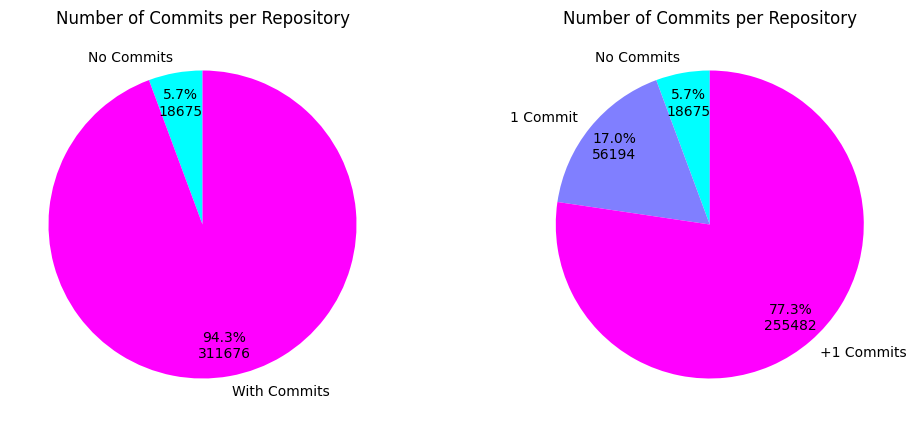

In [56]:
no_commits = queries[(queries.commits.isnull())]
one_commit = queries[(queries.commits == 1)]
more_one_commits = queries[(queries.commits > 1)]

data1 = [len(no_commits), len(one_commit) + len(more_one_commits)]
labels1 = ['No Commits', "With Commits"]
colors1 = [plt.get_cmap('cool')(i) for i in np.linspace(0, 1, len(data1))]

fig1, ax1 = plt.subplots(figsize=(12,5), ncols=2)
ax1[0].pie(data1, labels=labels1, colors=colors1, pctdistance=0.8,
        autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                 .format(prct_value, (len(queries) * prct_value / 100))), startangle=90)
ax1[0].set_title("Number of Commits per Repository")

data2 = [len(no_commits), len(one_commit) , len(more_one_commits)]
labels2 = ['No Commits', "1 Commit", "+1 Commits"]
colors = [plt.get_cmap('cool')(i) for i in np.linspace(0, 1, len(data2))]

ax1[1].pie(data2, labels=labels2, colors=colors, pctdistance=0.8,
        autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                 .format(prct_value, (len(queries) * prct_value / 100))), startangle=90)
ax1[1].set_title("Number of Commits per Repository");


#### Repositories with No Contributors

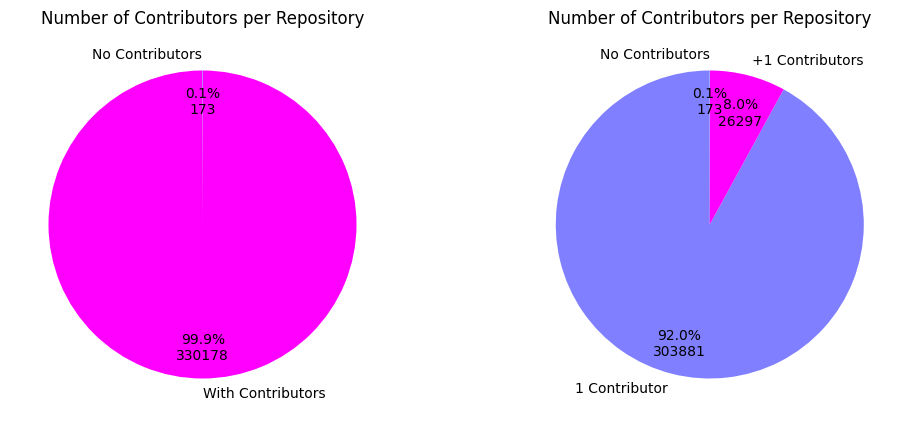

In [55]:
no_contributors = queries[(queries.contributors == 0)]
one_contributor = queries[(queries.contributors == 1)]
more_one_contributors = queries[(queries.contributors > 1)]

data3 = [len(no_contributors), len(one_contributor) + len(more_one_contributors)]
labels3 = ['No Contributors', "With Contributors"]
colors3 = [plt.get_cmap('cool')(i) for i in np.linspace(0, 1, len(data1))]

fig2, ax2 = plt.subplots(figsize=(12,5), ncols=2)
ax2[0].pie(data3, labels=labels3, colors=colors3, pctdistance=0.8,
        autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                 .format(prct_value, (len(queries) * prct_value / 100))), startangle=90)
ax2[0].set_title("Number of Contributors per Repository")

data4 = [len(no_contributors), len(one_contributor) , len(more_one_contributors)]
labels4 = ['No Contributors', "1 Contributor", "+1 Contributors"]
colors4 = [plt.get_cmap('cool')(i) for i in np.linspace(0, 1, len(data2))]

def piechart_format(prct_value):
    if prct_value < 1:
        return '{:.1f}%\n{:.0f}'.format(prct_value, (len(queries) * prct_value / 100))
    elif prct_value < 10:
        return '\n{:.1f}%\n{:.0f}'.format(prct_value, (len(queries) * prct_value / 100))
    else:
        return '{:.1f}%\n{:.0f}'.format(prct_value, (len(queries) * prct_value / 100))


ax2[1].pie(data4, labels=labels4, colors=colors4, pctdistance=0.8,
        autopct=piechart_format, startangle=90)
ax2[1].set_title("Number of Contributors per Repository");

#### Repositories with No Languages

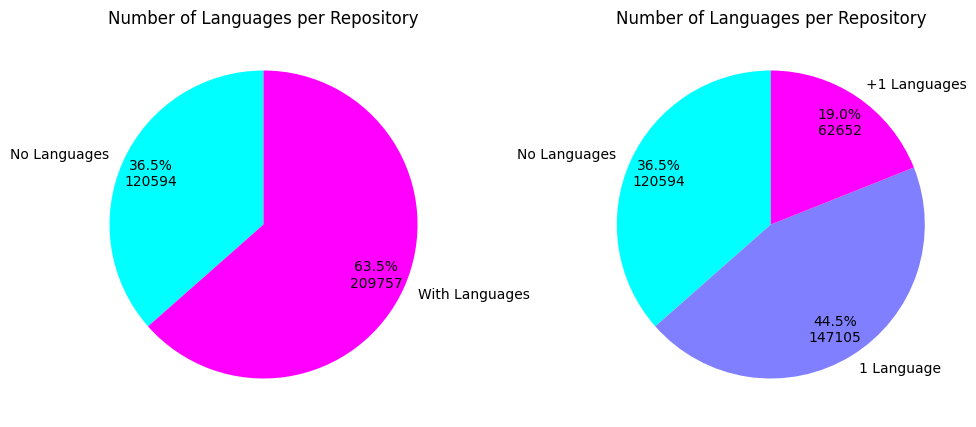

In [54]:
no_languages = queries[(queries.languages == 0)]
one_language = queries[(queries.languages == 1)]
more_one_languages = queries[(queries.languages > 1)]

data5 = [len(no_languages), len(one_language) + len(more_one_languages)]
labels5 = ['No Languages', "With Languages"]
colors5 = [plt.get_cmap('cool')(i) for i in np.linspace(0, 1, len(data5))]

fig3, ax3 = plt.subplots(figsize=(12,5), ncols=2)
ax3[0].pie(data5, labels=labels5, colors=colors5, pctdistance=0.8,
        autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                 .format(prct_value, (len(queries) * prct_value / 100))), startangle=90)
ax3[0].set_title("Number of Languages per Repository")

data6 = [len(no_languages), len(one_language) , len(more_one_languages)]
labels6 = ['No Languages', "1 Language", "+1 Languages"]
colors6 = [plt.get_cmap('cool')(i) for i in np.linspace(0, 1, len(data6))]

ax3[1].pie(data6, labels=labels6, colors=colors6, pctdistance=0.8,
        autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                 .format(prct_value, (len(queries) * prct_value / 100))), startangle=90)
ax3[1].set_title("Number of Languages per Repository");


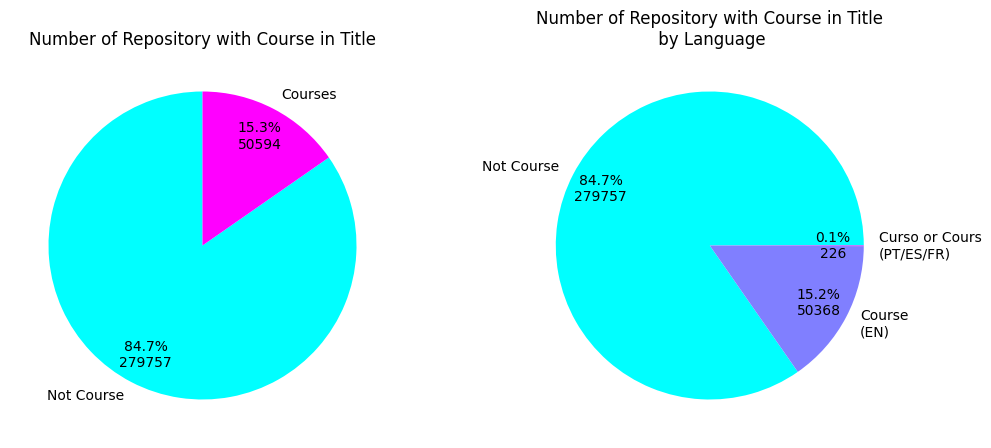

In [85]:
queries2 = queries.copy()
queries2[['user', 'name']] = queries2['repo'].str.split('/', expand=True)

en = queries2[queries2['name'].str.contains('course')]
pt_es = queries2[queries2['name'].str.contains('curso')]
fr = queries2[queries2['name'].str.contains(r'\bcours(?!e)\b')]
not_course = len(queries) - len(en) - len(pt_es) - len(fr)

data5 = [not_course, len(en) + len(pt_es) + len(fr)]
labels5 = ['Not Course', "Courses"]
colors5 = [plt.get_cmap('cool')(i) for i in np.linspace(0, 1, len(data5))]

fig4, ax4 = plt.subplots(figsize=(12,5), ncols=2)
ax4[0].pie(data5, labels=labels5, colors=colors5, pctdistance=0.8,
        autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                 .format(prct_value, (len(queries) * prct_value / 100))), startangle=90)
ax4[0].set_title("Number of Repository with Course in Title")

data6 = [not_course, len(en), len(pt_es) + len(fr)]
labels6 = ["Not Course", "Course\n(EN)", "Curso or Cours\n(PT/ES/FR)"]
colors6 = [plt.get_cmap('cool')(i) for i in np.linspace(0, 1, len(data6))]

ax4[1].pie(data6, labels=labels6, colors=colors6, pctdistance=0.8,
        autopct=(lambda prct_value: '{:.1f}%\n{:.0f}'
                 .format(prct_value, (len(queries) * prct_value / 100))), startangle=0)
ax4[1].set_title("Number of Repository with Course in Title\n by Language");